<a href="https://colab.research.google.com/github/preethitp/SHAP/blob/main/shaplime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LABELS:**

1: Working at Computer (workingPC).

2: Standing Up, Walking and Going up/down stairs.

3: Standing (standing).

4: Walking (waking).

5: Going Up/Down Stairs (stairs).

6: Walking and Talking with Someone.

7: Talking while Standing (talking).

In [71]:
pip install lime

In [231]:
!pip install shap

In [193]:
from glob import glob
import pandas as pd
import sklearn.ensemble
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
#from IPython.display import Image, display
import lime 
import lime.lime_tabular 
import time 
from os import listdir
import matplotlib.pyplot as plt 
import numpy as np
import shap


In [74]:

all_data = glob("/har_dataset - Sheet1.csv")
all_data[:3]


['/har_dataset - Sheet1.csv']

In [75]:
def load_dataset(all_data):
    subjects = pd.DataFrame([])
    for i,name in enumerate(all_data):
        df = pd.read_csv(name, header=None)
        df['subject_id'] = i+1
        subjects = subjects.append(df.iloc[:,1:])
    return subjects
subjects_df = load_dataset(all_data)
subjects_df.columns = ['x', 'y', 'z', 'label','subject_id']
subjects_df.head(100)



x     y     z  label  subject_id
0   1502  2215  2153      1           1
1   1667  2072  2047      1           1
2   1611  1957  1906      1           1
3   1601  1939  1831      1           1
4   1643  1965  1879      1           1
..   ...   ...   ...    ...         ...
95  1913  2347  2037      2           1
96  1914  2335  2027      2           1
97  1927  2329  2028      2           1
98  1940  2307  2022      2           1
99  1948  2304  2025      2           1

[100 rows x 5 columns]

In [76]:
print('Loaded %d subjects' % len(subjects_df.subject_id.unique()))

Loaded 1 subjects


In [77]:
X = subjects_df[['x','y','z']]
y = subjects_df['label']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [86]:
!pip install xgboost

In [87]:
import xgboost as xgb 



**XGBOOST REGRESSOR**

**LOCAL INTERPRETABILITY-XGBOOST SHAP**

In [88]:
import xgboost as xgb 
xgb_model = xgb.train({'objective':'reg:linear'}, xgb.DMatrix(X_train, label=y_train))

[04:51:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [89]:
explainerXGB = shap.TreeExplainer(xgb_model)
shap_values_XGB_test = explainerXGB.shap_values(X_test)
shap_values_XGB_train = explainerXGB.shap_values(X_train)

In [90]:
df_shap_XGB_test = pd.DataFrame(shap_values_XGB_test, columns=X_test.columns.values)
df_shap_XGB_train = pd.DataFrame(shap_values_XGB_train, columns=X_train.columns.values)

In [91]:
# if a feature has 10 or less unique values then treat it as categorical
categorical_features = np.argwhere(np.array([len(set(X_train.values[:,x]))
for x in range(X_train.values.shape[1])]) <= 10).flatten()
 


In [186]:
# j will be the record we explain
j = 0
# initialize js for SHAP
shap.initjs()
shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[j], X_test.iloc[[j]])

In [250]:
shap.initjs()
shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test, X_test)


# ***Global interpretability*** - **for XGboost model using SHAP**

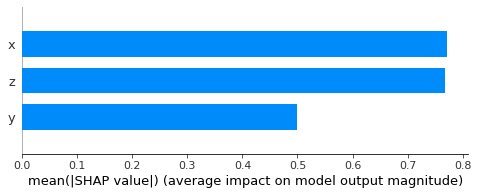

In [93]:
shap.summary_plot(shap_values_XGB_train, X_train, plot_type="bar")


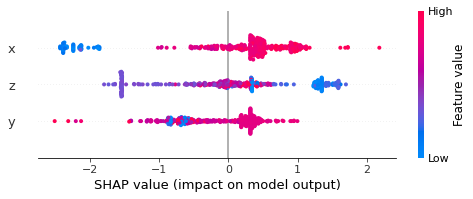

In [94]:
shap.summary_plot(shap_values_XGB_train, X_train)

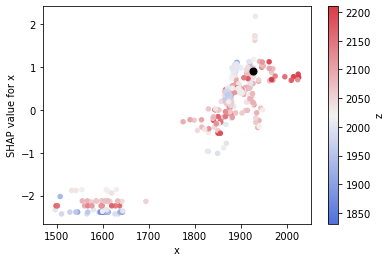

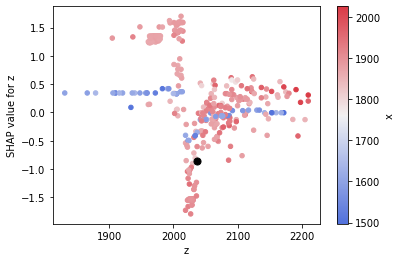

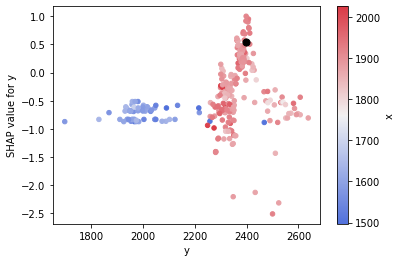

In [95]:
import seaborn as sns

# inputs = column of interest as string, column for coloring as string, df of our data, SHAP df, 
#      x position of the black dot, y position of the black dot
def dep_plt(col, color_by, base_actual_df, base_shap_df, overlay_x, overlay_y):
  cmap=sns.diverging_palette(260, 10, sep=1, as_cmap=True) #seaborn palette
  f, ax = plt.subplots() 
  points = ax.scatter(base_actual_df[col], base_shap_df[col], c=base_actual_df[color_by], s=20, cmap=cmap)
  f.colorbar(points).set_label(color_by)
  ax.scatter(overlay_x, overlay_y, color='black', s=50) 
  plt.xlabel(col) 
  plt.ylabel("SHAP value for " + col) 
  plt.show()
 
# get list of model inputs in order of SHAP importance
imp_cols = df_shap_XGB_train.abs().mean().sort_values(ascending=False).index.tolist()
 
# loop through this list to show top 3 dependency plots
for i in range(0, len(imp_cols)):
    #plot the top var and color by the 2nd var 
  if i == 0 : 
    dep_plt(imp_cols[i],  
    imp_cols[i+1],  
    X_train,  
    df_shap_XGB_train, 
    X_test.iloc[j,:][imp_cols[i]], 
    df_shap_XGB_test.iloc[j,:][imp_cols[i]]) 
#plot the 2nd and 3rd vars and color by the top var
  if (i >0) and (i <= 3):  
    dep_plt(imp_cols[i],  
    imp_cols[0], X_train, 
    df_shap_XGB_train,
    X_test.iloc[j,:][imp_cols[i]], 
    df_shap_XGB_test.iloc[j,:][imp_cols[i]])

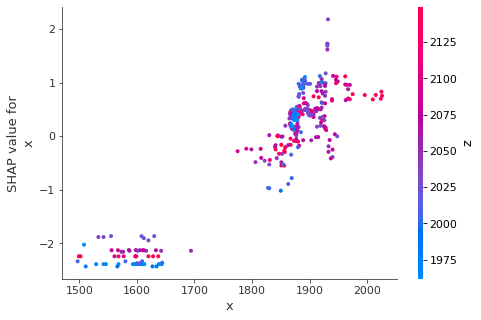

In [96]:
shp_plt = shap.dependence_plot("x", shap_values_XGB_train, X_train)

**DEECISION TREE CLASSIFIER**

In [97]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:
predicted = model.predict(X_test)

In [99]:
print("ACCURACY SCORE\n")
print(metrics.accuracy_score(y_test, predicted))
print("\nCONFUSION MATRIX\n")
print(metrics.confusion_matrix(y_test, predicted))
print("\nCLASSIFICATION REPORT\n")
print(metrics.classification_report(y_test, predicted))

ACCURACY SCORE

0.73

CONFUSION MATRIX

[[12  0  0  0  0  0  0]
 [ 0  5  0  4  1  0  1]
 [ 0  0 16  0  0  0  0]
 [ 0  3  0  5  7  0  0]
 [ 0  3  0  7  8  0  0]
 [ 0  0  0  0  0 16  0]
 [ 0  0  0  0  1  0 11]]

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.45      0.45      0.45        11
           3       1.00      1.00      1.00        16
           4       0.31      0.33      0.32        15
           5       0.47      0.44      0.46        18
           6       1.00      1.00      1.00        16
           7       0.92      0.92      0.92        12

    accuracy                           0.73       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.73      0.73      0.73       100



In [148]:

dt_explainer = shap.KernelExplainer(model.predict, X_test)
dt_shap_values = dt_explainer.shap_values(X_test)

**DECISION TREE CLASSIFIER - LOCAL INTERPRETABILITY**

In [150]:
shap.initjs()
shap.force_plot(dt_explainer.expected_value,dt_shap_values[0,:], X_test.iloc[0,:]) 


In [151]:
shap.initjs()
shap.force_plot(dt_explainer.expected_value, dt_shap_values, X_test)

**DECISION TREE CLASSIFIER - GLOBAL INTERPRETABILITY**

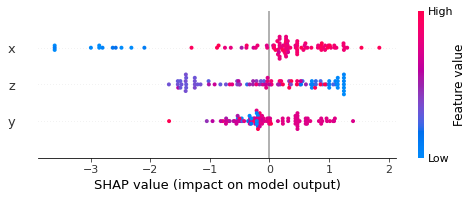

In [152]:
shap.summary_plot(dt_shap_values, X_test)

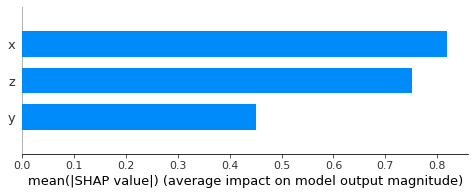

In [154]:
shap.summary_plot(dt_shap_values , X_train, plot_type="bar")

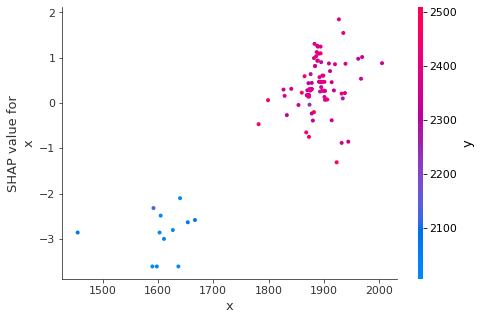

In [156]:
shap.dependence_plot("x", dt_shap_values, X_test)

**SCIKIT LEARN - GradientBoostingRegressor**

In [102]:
sk_xgb = sklearn.ensemble.GradientBoostingRegressor()
sk_xgb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [103]:
# Tree on Scikit GBT
explainerSKGBT = shap.TreeExplainer(sk_xgb)
shap_values_SKGBT_test = explainerSKGBT.shap_values(X_test)
shap_values_SKGBT_train = explainerSKGBT.shap_values(X_train)

In [104]:
df_shap_SKGBT_test = pd.DataFrame(shap_values_SKGBT_test, columns=X_test.columns.values)
df_shap_SKGBT_train = pd.DataFrame(shap_values_SKGBT_train, columns=X_train.columns.values)

**GRADIENTBOOST REGRESSOR - LOCAL INTERPRETABILITY**

In [105]:
# j will be the record we explain
j = 0
# initialize js for SHAP
shap.initjs()
shap.force_plot(explainerSKGBT.expected_value, shap_values_SKGBT_test[j], X_test.iloc[[j]])

In [252]:
shap.initjs()
shap.force_plot(explainerSKGBT.expected_value, shap_values_SKGBT_test, X_test)


**GRADIENTBOOST REGRESSOR - GLOBAL INTERPRETABILITY**

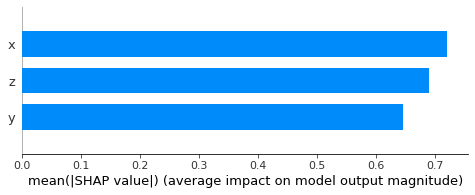

In [106]:
shap.summary_plot(shap_values_SKGBT_train, X_train, plot_type="bar")

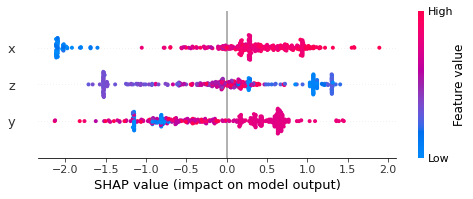

In [107]:
shap.summary_plot(shap_values_SKGBT_train, X_train)

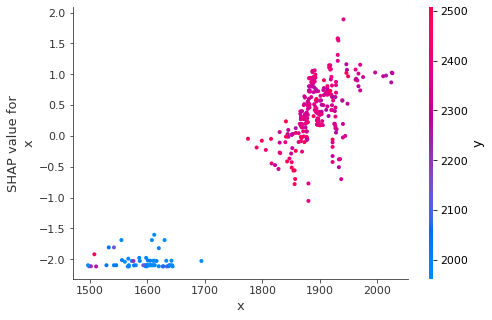

In [108]:
shp_plt = shap.dependence_plot("x", shap_values_SKGBT_train, X_train)

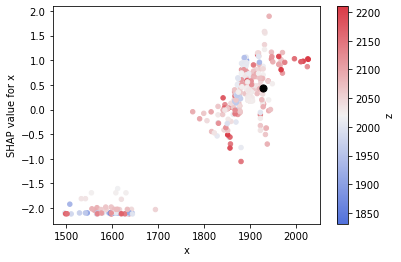

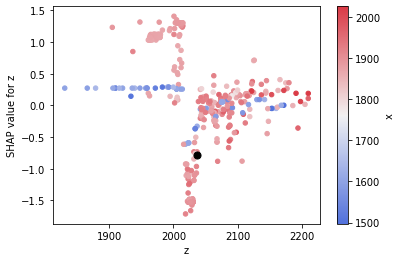

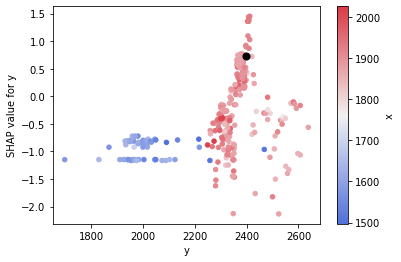

In [109]:
import seaborn as sns

# inputs = column of interest as string, column for coloring as string, df of our data, SHAP df, 
#      x position of the black dot, y position of the black dot
def dep_plt(col, color_by, base_actual_df, base_shap_df, overlay_x, overlay_y):
  cmap=sns.diverging_palette(260, 10, sep=1, as_cmap=True) #seaborn palette
  f, ax = plt.subplots() 
  points = ax.scatter(base_actual_df[col], base_shap_df[col], c=base_actual_df[color_by], s=20, cmap=cmap)
  f.colorbar(points).set_label(color_by)
  ax.scatter(overlay_x, overlay_y, color='black', s=50) 
  plt.xlabel(col) 
  plt.ylabel("SHAP value for " + col) 
  plt.show()
 
# get list of model inputs in order of SHAP importance
imp_cols = df_shap_SKGBT_train.abs().mean().sort_values(ascending=False).index.tolist()
 
# loop through this list to show top 3 dependency plots
for i in range(0, len(imp_cols)):
    #plot the top var and color by the 2nd var 
  if i == 0 : 
    dep_plt(imp_cols[i],  
    imp_cols[i+1],  
    X_train,  
    df_shap_SKGBT_train, 
    X_test.iloc[j,:][imp_cols[i]], 
    df_shap_SKGBT_test.iloc[j,:][imp_cols[i]]) 
#plot the 2nd and 3rd vars and color by the top var
  if (i >0) and (i <= 3):  
    dep_plt(imp_cols[i],  
    imp_cols[0], X_train, 
    df_shap_SKGBT_train,
    X_test.iloc[j,:][imp_cols[i]], 
    df_shap_SKGBT_test.iloc[j,:][imp_cols[i]])

**KNN**

In [110]:
knn = sklearn.neighbors.KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [111]:
X_train_summary = shap.kmeans(X_train, 10)

t0 = time.time()
explainerKNN = shap.KernelExplainer(knn.predict, X_train_summary)
shap_values_KNN_test = explainerKNN.shap_values(X_test)
shap_values_KNN_train = explainerKNN.shap_values(X_train)
t1 = time.time()
timeit=t1-t0
timeit

2.9879050254821777

In [112]:
df_shap_KNN_test = pd.DataFrame(shap_values_KNN_test, columns=X_test.columns.values)
df_shap_KNN_train = pd.DataFrame(shap_values_KNN_train, columns=X_train.columns.values)

**KNN - LOCAL INTERPRETABILITY**

In [113]:
j = 0
# initialize js for SHAP
shap.initjs()

shap.force_plot(explainerKNN.expected_value, shap_values_KNN_test[j], X_test.iloc[[j]])

In [254]:
shap.initjs()

shap.force_plot(explainerKNN.expected_value, shap_values_KNN_test, X_test)


**KNN - GLOBAL INTERPRETABILITY**

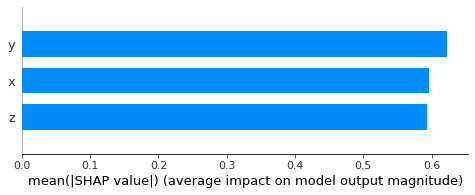

In [114]:
shap.summary_plot(shap_values_KNN_train, X_train, plot_type="bar")

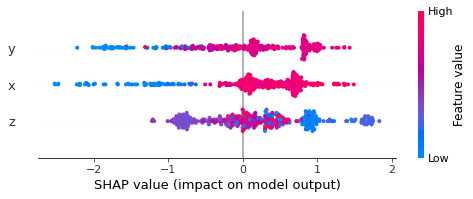

In [115]:
shap.summary_plot(shap_values_KNN_train, X_train)

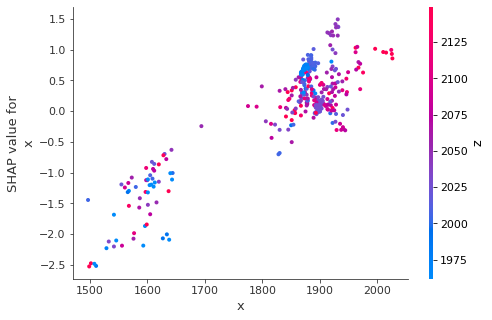

In [116]:
shp_plt = shap.dependence_plot("x", shap_values_KNN_train, X_train)

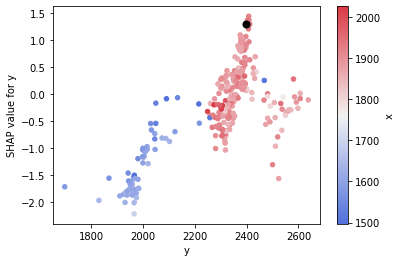

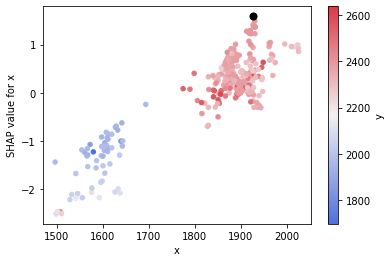

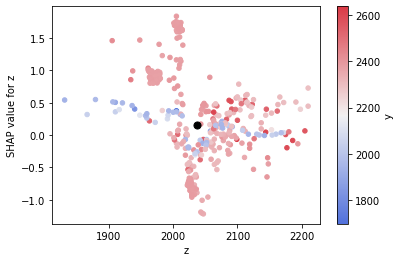

In [117]:
import seaborn as sns

# inputs = column of interest as string, column for coloring as string, df of our data, SHAP df, 
#      x position of the black dot, y position of the black dot
def dep_plt(col, color_by, base_actual_df, base_shap_df, overlay_x, overlay_y):
  cmap=sns.diverging_palette(260, 10, sep=1, as_cmap=True) #seaborn palette
  f, ax = plt.subplots() 
  points = ax.scatter(base_actual_df[col], base_shap_df[col], c=base_actual_df[color_by], s=20, cmap=cmap)
  f.colorbar(points).set_label(color_by)
  ax.scatter(overlay_x, overlay_y, color='black', s=50) 
  plt.xlabel(col) 
  plt.ylabel("SHAP value for " + col) 
  plt.show()
 
# get list of model inputs in order of SHAP importance
imp_cols = df_shap_KNN_train.abs().mean().sort_values(ascending=False).index.tolist()
 
# loop through this list to show top 3 dependency plots
for i in range(0, len(imp_cols)):
    #plot the top var and color by the 2nd var 
  if i == 0 : 
    dep_plt(imp_cols[i],  
    imp_cols[i+1],  
    X_train,  
    df_shap_KNN_train, 
    X_test.iloc[j,:][imp_cols[i]], 
    df_shap_KNN_test.iloc[j,:][imp_cols[i]]) 
#plot the 2nd and 3rd vars and color by the top var
  if (i >0) and (i <= 3):  
    dep_plt(imp_cols[i],  
    imp_cols[0], X_train, 
    df_shap_KNN_train,
    X_test.iloc[j,:][imp_cols[i]], 
    df_shap_KNN_test.iloc[j,:][imp_cols[i]])

**GradientBoostingClassifier**

In [127]:
from sklearn import ensemble
n_estimators = 500
gbm = ensemble.GradientBoostingClassifier(
            n_estimators=n_estimators,
            random_state=0)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [257]:

gbm_explainer = shap.KernelExplainer(gbm.predict, X_train)
gbm_shap_values = gbm_explainer.shap_values(X_train)


Using 396 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


**GRADIENT BOOST CLASSIFIER - LOCAL INTERPRETABILITY**

In [259]:
j = 0
# initialize js for SHAP
shap.initjs()

shap.force_plot(gbm_explainer.expected_value,gbm_shap_values[0,:], X_test.iloc[0,:]) #, link="logit")

In [255]:
shap.initjs()
shap.force_plot(gbm_explainer.expected_value, gbm_shap_values, X_test)


**GRADIENT BOOST CLASSIFIER - GLOBAL INTERPRETABILITY**



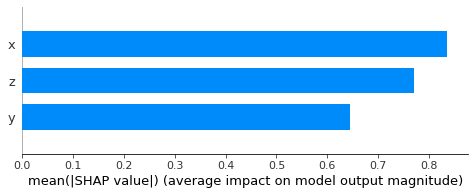

In [256]:
shap.summary_plot(gbm_shap_values, X_test,plot_type="bar")

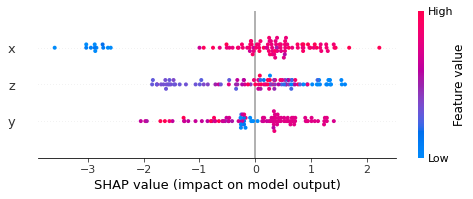

In [134]:

shap.summary_plot(gbm_shap_values, X_test)

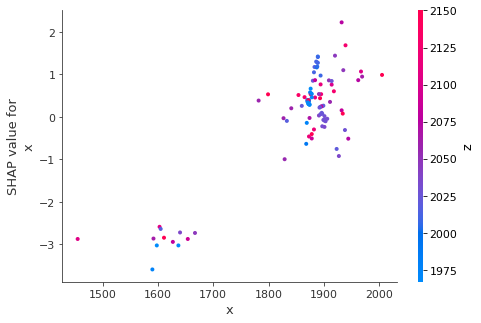

In [135]:
shap.dependence_plot("x", gbm_shap_values, X_test)

**SVM**

In [139]:
from sklearn import svm
svm = svm.SVC(gamma='scale', decision_function_shape='ovo')
svm.fit(X_train, y_train)  


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [140]:

svm_explainer = shap.KernelExplainer(svm.predict, X_test)
svm_shap_values = svm_explainer.shap_values(X_test)

**SVM - LOCAL INTERPRETABILITY**

In [142]:
shap.initjs()

shap.force_plot(svm_explainer.expected_value,svm_shap_values[0,:], X_test.iloc[0,:])

In [144]:
shap.initjs()

shap.force_plot(svm_explainer.expected_value, svm_shap_values, X_test)

**SVM - GLOBAL INTERPRETABILITY**

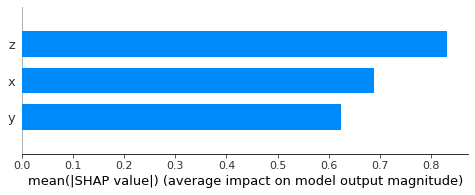

In [261]:
shap.summary_plot(svm_shap_values, X_test, plot_type="bar")

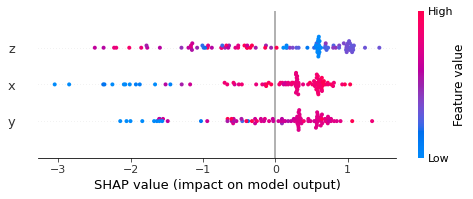

In [145]:
shap.summary_plot(svm_shap_values, X_test)

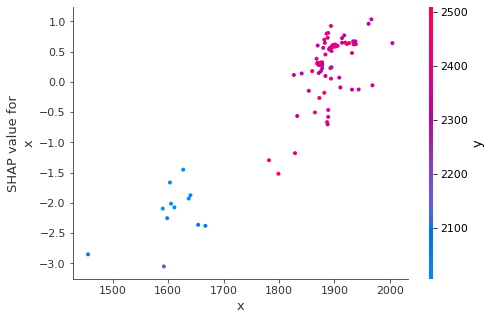

In [147]:
shap.dependence_plot("x", svm_shap_values, X_test)

**RANDOM FOREST**

In [262]:
import sklearn.ensemble #for building models

rf = sklearn.ensemble.RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [264]:
explainerRF = shap.TreeExplainer(rf)
shap_values_RF_test = explainerRF.shap_values(X_test)
shap_values_RF_train = explainerRF.shap_values(X_train)

In [265]:
categorical_features = np.argwhere(np.array([len(set(X_train.values[:,x]))
for x in range(X_train.values.shape[1])]) <= 10).flatten()

**RF - LOCAL INTERPRETABILITY**

In [267]:
j = 0
# initialize js for SHAP
shap.initjs()

shap.force_plot(explainerRF.expected_value, shap_values_RF_test[j], X_test.iloc[[j]])

In [269]:
shap.initjs()
shap.force_plot(explainerRF.expected_value, shap_values_RF_test, X_test)


**RF - GLOBAL INTERPRETABILITY**

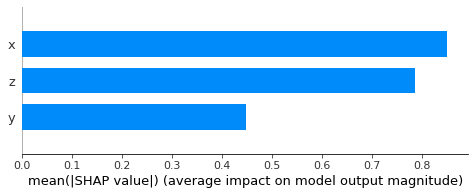

In [270]:
shap.summary_plot(shap_values_RF_train, X_train, plot_type="bar")

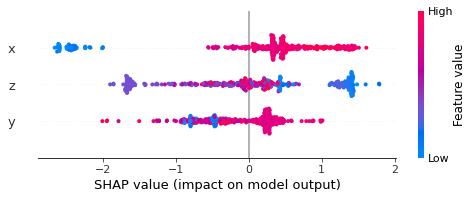

In [272]:
shap.summary_plot(shap_values_RF_train, X_train)

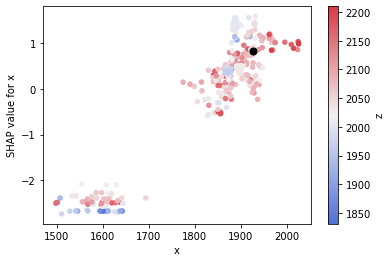

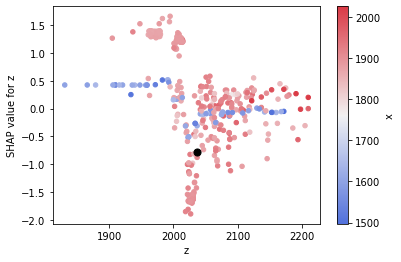

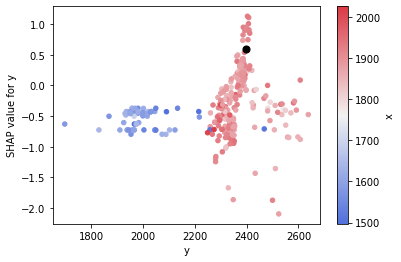

In [271]:
import seaborn as sns

# inputs = column of interest as string, column for coloring as string, df of our data, SHAP df, 
#      x position of the black dot, y position of the black dot
def dep_plt(col, color_by, base_actual_df, base_shap_df, overlay_x, overlay_y):
  cmap=sns.diverging_palette(260, 10, sep=1, as_cmap=True) #seaborn palette
  f, ax = plt.subplots() 
  points = ax.scatter(base_actual_df[col], base_shap_df[col], c=base_actual_df[color_by], s=20, cmap=cmap)
  f.colorbar(points).set_label(color_by)
  ax.scatter(overlay_x, overlay_y, color='black', s=50) 
  plt.xlabel(col) 
  plt.ylabel("SHAP value for " + col) 
  plt.show()
 
# get list of model inputs in order of SHAP importance
imp_cols = df_shap_RF_train.abs().mean().sort_values(ascending=False).index.tolist()
 
# loop through this list to show top 3 dependency plots
for i in range(0, len(imp_cols)):
    #plot the top var and color by the 2nd var 
  if i == 0 : 
    dep_plt(imp_cols[i],  
    imp_cols[i+1],  
    X_train,  
    df_shap_RF_train, 
    X_test.iloc[j,:][imp_cols[i]], 
    df_shap_RF_test.iloc[j,:][imp_cols[i]]) 
#plot the 2nd and 3rd vars and color by the top var
  if (i >0) and (i <= 3):  
    dep_plt(imp_cols[i],  
    imp_cols[0], X_train, 
    df_shap_RF_train,
    X_test.iloc[j,:][imp_cols[i]], 
    df_shap_RF_test.iloc[j,:][imp_cols[i]])

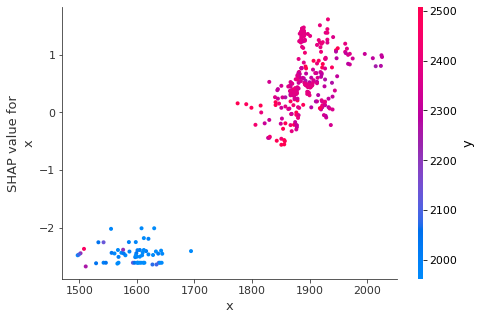

In [274]:
shp_plt = shap.dependence_plot("x", shap_values_RF_train, X_train)